In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('output2_final.csv', index_col=False)
data.head(5)

,radius_mean,texture_mean,concavity_mean,concave points_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,diagnosis
0,17.99,10.38,0.3001,0.14710,153.40,25.38,17.33,184.60,2019.0,0.7119,0.2654,1
1,20.57,17.77,0.0869,0.07017,74.08,24.99,23.41,158.80,1956.0,0.2416,0.1860,1
2,19.69,21.25,0.1974,0.12790,94.03,23.57,25.53,152.50,1709.0,0.4504,0.2430,1
3,11.42,20.38,0.2414,0.10520,27.23,14.91,26.50,98.87,567.7,0.6869,0.2575,1
4,20.29,14.34,0.1980,0.10430,94.44,22.54,16.67,152.20,1575.0,0.4000,0.1625,1


In [3]:
data.head(5)

,radius_mean,texture_mean,concavity_mean,concave points_mean,area_se,radius_worst,texture_worst,perimeter_worst,area_worst,concavity_worst,concave points_worst,diagnosis
0,17.99,10.38,0.3001,0.14710,153.40,25.38,17.33,184.60,2019.0,0.7119,0.2654,1
1,20.57,17.77,0.0869,0.07017,74.08,24.99,23.41,158.80,1956.0,0.2416,0.1860,1
2,19.69,21.25,0.1974,0.12790,94.03,23.57,25.53,152.50,1709.0,0.4504,0.2430,1
3,11.42,20.38,0.2414,0.10520,27.23,14.91,26.50,98.87,567.7,0.6869,0.2575,1
4,20.29,14.34,0.1980,0.10430,94.44,22.54,16.67,152.20,1575.0,0.4000,0.1625,1


In [4]:
print(data.groupby('diagnosis').size())

diagnosis
0    357
1    212
dtype: int64


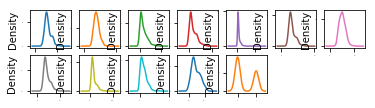

In [5]:
data.plot(kind='density', subplots=True, layout=(5,7), sharex=False, legend=False, fontsize=1)
plt.show()

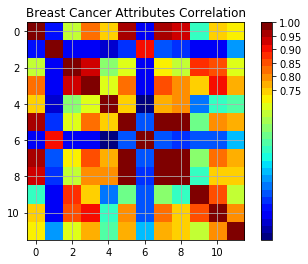

In [6]:
from matplotlib import cm as cm

fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(data.corr(), interpolation="none", cmap=cmap)
ax1.grid(True)
plt.title('Breast Cancer Attributes Correlation')
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.75,.8,.85,.90,.95,1])
plt.show()

In [7]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
import time

In [8]:
Y = data['diagnosis'].values
X = data.drop('diagnosis', axis=1).values

X_train, X_test, Y_train, Y_test = train_test_split (X, Y, test_size = 0.20, random_state=21)

In [9]:
print ('The size of our training "X" (input features) is', X_train.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', X_test.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', Y_train.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', Y_test.shape)

The size of our training "X" (input features) is (455, 11)


The size of our testing "X" (input features) is (114, 11)


The size of our training "y" (output feature) is (455,)


The size of our testing "y" (output features) is (114,)


# #svc_model Traing

In [13]:
svc_model = SVC()

In [14]:
svc_model.fit(X_train, Y_train)

C:\Users\Thusiyanth\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [15]:
y_predict = svc_model.predict(X_test)

In [17]:
svc_model.score(X_test, Y_test)

0.6666666666666666

In [16]:
from sklearn.externals import joblib

In [34]:
joblib.dump(svc_model, './SVM_model.pkl')

['./SVM_model.pkl']

In [35]:
print(Y_test)
print(data.columns)

[0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 1 1 0 0 1 0 1 1 0 1
 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1
 0 0 1]
Index(['radius_mean', 'texture_mean', 'concavity_mean', 'concave points_mean',
       'area_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'concavity_worst', 'concave points_worst', 'diagnosis'],
      dtype='object')
